In [569]:
import os
from utils import *
from os.path import join
from pprint import pprint

import numpy as np
from scipy.stats import circmean
from math import radians

import requests
import xml.etree.ElementTree as ET

In [102]:
spacing = 10

# NOTE: can set bounds to np.inf if desired
# NOTE: Works for cylindrical bounds

# bound in Y
if spacing == 10:
    y_lb, y_ub = -155, 155
elif spacing == 20:
    y_lb, y_ub = -310,310
else:
    pass
    

# bound in XZ-plane
rad_ub = 100

In [3]:
def get_model(nmldb_id,save=False,path_to_save=None):
    '''
        NeuroML-DB API query for model
        TODO: Check if file is store already somewhere and load that instead of calling API.
        ----
        PARAMETER:
            - nmldb_id : (str) Contains NML ID
            - save : (bool)
            - path_to_save : (str)
        OUTPUT:
            - mldb_model_response : (str) Contains all model specifications
    '''


    nmldb_xml_url = 'https://neuroml-db.org/render_xml_file?modelID='

    model_xml_url = nmldb_xml_url + nmldb_id

    xml_name = nmldb_id+'.xml'

    filename = join(path_to_save,xml_name)
    
    model_xml_response = requests.get(model_xml_url)

    # If file exists, load and return
    if os.path.isfile(filename):
           
        
        print('Returning model file as string')
        return model_xml_response.text
    
    else:
        # save file
        if save:

            if path_to_save:
                filename = join(path_to_save,xml_name)
            else:
                filename = xml_name

            with open(filename, 'wb') as file:
                file.write(model_xml_response.content)
        


   
   


In [4]:
cwd = os.getcwd()
path_to_save = cwd

In [5]:
# NMLDB_ID = 'NMLCL000687'
NMLDB_ID = 'NMLCL000695'

In [7]:
# parse neuron_model file
model_file = join(path_to_save,NMLDB_ID+'.xml')
model_tree = ET.parse(model_file)

In [15]:
root = model_tree.getroot()

In [17]:
root.tag, root.attrib

('{http://www.neuroml.org/schema/neuroml2}neuroml',
 {'{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'http://www.neuroml.org/schema/neuroml2 https://raw.github.com/NeuroML/NeuroML2/development/Schemas/NeuroML2/NeuroML_v2beta4.xsd',
  'id': 'NeuroML2_file_exported_from_NEURON'})

In [18]:
for child in root:
    print(child.tag, child.attrib)

{http://www.neuroml.org/schema/neuroml2}include {'href': 'pas.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'Ih.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'NaTs2_t.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'SKv3_1.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'Im.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'NaTa_t.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'K_Tst.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'Nap_Et2.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'SK_E2.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'Ca_HVA.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'K_Pst.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'CaDynamics_E2_NML2.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'Ca

In [10]:
# or directly from neuron_model string
root = ET.fromstring(neuron_model)

TypeError: a bytes-like object is required, not 'ElementTree'

In [8]:
root.tag, root.attrib

('{http://www.neuroml.org/schema/neuroml2}neuroml',
 {'{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'http://www.neuroml.org/schema/neuroml2 https://raw.github.com/NeuroML/NeuroML2/development/Schemas/NeuroML2/NeuroML_v2beta4.xsd',
  'id': 'NeuroML2_file_exported_from_NEURON'})

In [9]:
for child in root:
    print(child.tag, child.attrib)

{http://www.neuroml.org/schema/neuroml2}include {'href': 'pas.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'Ih.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'NaTs2_t.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'SKv3_1.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'Im.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'NaTa_t.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'K_Tst.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'Nap_Et2.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'SK_E2.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'Ca_HVA.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'K_Pst.channel.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'CaDynamics_E2_NML2.nml'}
{http://www.neuroml.org/schema/neuroml2}include {'href': 'Ca

# look at cell stuff

In [19]:
cell = root[-1]

In [20]:
for child in cell:
    print(child.tag, child.attrib)

{http://www.neuroml.org/schema/neuroml2}notes {}
{http://www.neuroml.org/schema/neuroml2}morphology {'id': 'morphology'}
{http://www.neuroml.org/schema/neuroml2}biophysicalProperties {'id': 'biophys'}


# look at morphology stuff

In [21]:
morpho = cell[1]

In [22]:
morpho

<Element '{http://www.neuroml.org/schema/neuroml2}morphology' at 0x7fd9669ca710>

In [23]:
for i, child in enumerate(morpho):
     if i == len(morpho)-1:
        print(child.attrib)

{'id': 'somatic'}


In [24]:
segmentGroups = {}
for i, group in enumerate(morpho.findall('{http://www.neuroml.org/schema/neuroml2}segmentGroup')):
    
    segmentGroups.update({i:group})
    

In [25]:
segmentGroups[10].attrib

{'neuroLexId': 'sao864921383', 'id': 'axon_0'}

In [26]:
comp_domains = {}
for key, val in segmentGroups.items():
    
    if val.attrib['id'] in ['somatic','basal','axonal','apical']:
        
        comp_domains.update({val.attrib['id']:val})


# Find all somatic compartments

In [372]:
comp_domains['somatic']

<Element '{http://www.neuroml.org/schema/neuroml2}segmentGroup' at 0x7fd965819fb0>

In [373]:
for child in comp_domains['somatic']:
    print(child.tag,child.attrib)

{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'soma_0'}


In [374]:
soma_group = comp_domains['somatic'][0].attrib['segmentGroup']

In [375]:
soma_segments = {}
for segment in morpho.findall('{http://www.neuroml.org/schema/neuroml2}segment'):
    if soma_group in segment.attrib['name']:
        soma_segments.update({segment.attrib['id']:segment.attrib['name']})

In [376]:
soma_segments # use late to find stems in other compartment domains


{'0': 'Seg0_soma_0',
 '2': 'Seg1_soma_0',
 '3': 'Seg2_soma_0',
 '4': 'Seg3_soma_0',
 '5': 'Seg4_soma_0',
 '6': 'Seg5_soma_0',
 '7': 'Seg6_soma_0',
 '8': 'Seg7_soma_0',
 '9': 'Seg8_soma_0',
 '10': 'Seg9_soma_0',
 '11': 'Seg10_soma_0',
 '12': 'Seg11_soma_0',
 '13': 'Seg12_soma_0',
 '14': 'Seg13_soma_0',
 '15': 'Seg14_soma_0',
 '16': 'Seg15_soma_0',
 '17': 'Seg16_soma_0',
 '18': 'Seg17_soma_0',
 '19': 'Seg18_soma_0',
 '20': 'Seg19_soma_0'}

In [377]:
for child in morpho[0]:
    print(child.tag,child.attrib)

{http://www.neuroml.org/schema/neuroml2}proximal {'y': '-1.757670e+01', 'x': '4.143960e-01', 'z': '0.000000e+00', 'diameter': '4.927350e+00'}
{http://www.neuroml.org/schema/neuroml2}distal {'y': '-1.588340e+01', 'x': '4.354690e-01', 'z': '0.000000e+00', 'diameter': '8.836220e+00'}


In [378]:
def get_domain_segments(morpho,domain_groups,bounds=None):
    domain_segments  = {}
    
    for segment in morpho.findall('{http://www.neuroml.org/schema/neuroml2}segment'):
        # leverage standardized segment naming
        seg_name = segment.attrib['name'].split('_')
        this_group = seg_name[1]+'_'+seg_name[2]
        
        if this_group in domain_groups:
            
            if not bounds is None:
                [y_lb,y_ub] = bounds[0]
                rad_ub = bounds[1]
                
                # always the last field
                distal = segment[-1]
                x,y,z  = float(distal.attrib['x']),float(distal.attrib['y']),float(distal.attrib['z'])
                
                # project onto xz-plane
                xz = np.sqrt(x**2+z**2)
                
                # cylinder interval
                if is_in_interval(y,y_lb,y_ub) and xz<=rad_ub:
                    domain_segments.update({segment.attrib['id']:segment.attrib['name']})
                else:
                    continue  
                    
            # only do if bounds not included
            else:
                domain_segments.update({segment.attrib['id']:segment.attrib['name']})
                
    return domain_segments


def get_segment_coord_lists(domain_segments,morpho,stems,verbose=False):

    segment_parents = {}
    no_parent = {}

    # for compute domain-level props
    proximal_list = []
    distal_list = []

    for segment in morpho.findall('{http://www.neuroml.org/schema/neuroml2}segment'):
        seg_id = segment.attrib['id']
        seg_name = segment.attrib['name']


        if seg_name in domain_segments.values():

            parent_id = segment[0].attrib['segment']

            # if not stem of soma, look at parent for proximal
            if seg_name in stems.values():

                # parent is segment[0]
                proximal = segment[1]
                distal = segment[2]
                
                segment_parents.update({seg_id:distal})
            else:
                # no proximal so distal is segment[1]
                distal = segment[1]
                segment_parents.update({seg_id:distal})
                
                # sometimes parent segment is out of bounds so not included
                try:
                    proximal = segment_parents[parent_id]
            
                except KeyError:
                    no_parent.update({seg_id:{}})
                    no_parent[seg_id].update({'Name':seg_name})
                    no_parent[seg_id].update({'Parent ID':parent_id})
                    
                    # don't append anything to list
                    continue
                    
            proximal_list.append(proximal)
            distal_list.append(distal)
    if verbose:
        print('Removed %s segments from list...'%(len(domain_segments) - len(proximal_list)))
    return proximal_list, distal_list


In [414]:
these_segments = soma_segments
for segment in morpho.findall('{http://www.neuroml.org/schema/neuroml2}segment'):
    seg_id = segment.attrib['id']
    if seg_id in these_segments.keys():

        # this part only applies to soma compartments
        if 'Seg0' in segment.attrib['name']: 
            proximal = segment[0]
            distal = segment[1]
            
            # most medial soma segment
            soma_y_prox = np.float(proximal.attrib['y'])
            soma_y_dist = np.float(distal.attrib['y'])


            # get direction of prox->dist
            if soma_y_prox<soma_y_dist:
                lb = soma_y_prox
                ub = soma_y_dist # this needs to be updated
                soma_dir = 1 # prox = more medial, dist = more lateral
                soma_root = lb # seg set to origin in simulation
            else:
                lb = soma_y_dist # this needs to be updated
                ub = soma_y_prox 
                soma_dir = -1 # prox = more lateral, dist = more medial
                soma_root = ub # seg set to origin in simulation
        else:

            # find parent
            parent_id = segment[0].attrib['segment']

            proximal = soma_parents[parent_id]
            distal = segment[1]

            # update until find most lateral soma segment
            if soma_dir==1 and np.float(distal.attrib['y'])>ub:
                ub = np.float(distal.attrib['y'])
            if soma_dir==-1 and np.float(disal.attrib['y'])<lb:
                lb = np.float(distal.attrib['y'])

        soma_parents.update({seg_id:distal})

#         soma_length += compute_segment_length(proximal,distal)

# compute soma center shift
soma_center = lb + (ub-lb)/2 # this is used to define upper/lower groups of neurites
soma_length = ub-lb

In [412]:
soma_center, lb, ub, soma_length, ub-lb

(-0.6433, -17.5767, 16.2901, 33.8668, 33.8668)

In [34]:
soma_length

33.869422393959425

# Find all stems

In [35]:
stems = {}

for segment in morpho.findall('{http://www.neuroml.org/schema/neuroml2}segment'):
    seg_id = segment.attrib['id']
    seg_name = segment.attrib['name']
    
    if not seg_name in soma_segments.values():
    
        parent_id = segment[0].attrib['segment']

        if parent_id in soma_parents.keys():
            stems.update({seg_id:seg_name})
            

In [36]:
print('Number of stems = %s'%len(stems))
pprint(stems)

Number of stems = 10
{'1254': 'Seg0_dend_52',
 '1489': 'Seg0_dend_61',
 '1879': 'Seg0_dend_72',
 '21': 'Seg0_dend_0',
 '2545': 'Seg0_dend_89',
 '2613': 'Seg0_apic_0',
 '284': 'Seg0_dend_15',
 '357': 'Seg0_dend_24',
 '5576': 'Seg0_axon_0',
 '944': 'Seg0_dend_43'}


In [37]:
# compute stems cross-sectional areas
stem_names = []
stem_diams = []

for segment in morpho.findall('{http://www.neuroml.org/schema/neuroml2}segment'):
    seg_name = segment.attrib['name']

    if seg_name in stems.values():
                   
        proximal = segment[1]
        diameter = float(proximal.attrib['diameter'])
        stem_names.append(seg_name)
        stem_diams.append(diameter)

stem_diams = np.array(stem_diams)

In [38]:
stem_diams

array([6.42, 4.13, 1.61, 1.38, 1.61, 1.61, 1.83, 1.15, 2.75, 1.83])

In [39]:
stem_csas = compute_stem_csa(stem_diams)

In [40]:
print(stem_names)

['Seg0_apic_0', 'Seg0_dend_89', 'Seg0_dend_72', 'Seg0_dend_61', 'Seg0_dend_52', 'Seg0_dend_43', 'Seg0_dend_24', 'Seg0_dend_15', 'Seg0_dend_0', 'Seg0_axon_0']


In [41]:
np.sum(stem_csas)

65.60964929609996

In [42]:
for stem_id,name in stems.items():
    
    prox_list, dist_list = get_segment_coord_lists({stem_id:name},morpho,stems) 
    print(name,' angle:',compute_average_orientation(prox_list,dist_list)) # mean projection angle of all stem compartments off XZ-plane? -- needs to be restricted to local compartments e.g., apic


Seg0_apic_0  angle: 58.191075943475475
Seg0_dend_89  angle: 270.56304900094375
Seg0_dend_72  angle: 353.3284731161623
Seg0_dend_61  angle: 354.5290815870912
Seg0_dend_52  angle: 13.169625315911915
Seg0_dend_43  angle: 357.0082916590082
Seg0_dend_24  angle: 354.24301947688355
Seg0_dend_15  angle: 356.9215364625044
Seg0_dend_0  angle: 358.3036384909134
Seg0_axon_0  angle: 88.08612138303171


In [43]:
stem_id, name

('5576', 'Seg0_axon_0')

In [44]:
prox_list, dist_list

([<Element '{http://www.neuroml.org/schema/neuroml2}proximal' at 0x7fd966979c50>],
 [<Element '{http://www.neuroml.org/schema/neuroml2}distal' at 0x7fd966979cb0>])

# Find all axon compartments

In [45]:
for child in comp_domains['axonal']:
    print(child.tag,child.attrib)

{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'axon_0'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'axon_1'}


In [46]:
domain = 'axonal'

axon_groups = []

for seg_group in comp_domains[domain]:
    axon_groups.append(seg_group.attrib['segmentGroup'])

In [47]:
axon_groups

['axon_0', 'axon_1']

In [48]:
axon_segments = {}

for segment in morpho.findall('{http://www.neuroml.org/schema/neuroml2}segment'):
    
    # leverage standardized segment naming
    seg_name = segment.attrib['name'].split('_')
    this_group = seg_name[1]+'_'+seg_name[2]
    
    if this_group in axon_groups:
        axon_segments.update({segment.attrib['id']:segment.attrib['name']})

In [49]:
axon_segments

{'5576': 'Seg0_axon_0',
 '5577': 'Seg1_axon_0',
 '5578': 'Seg0_axon_1',
 '5579': 'Seg1_axon_1'}

In [204]:
stem_groups = [s.split('_')[1]+'_'+s.split('_')[2] for s in stems.values()]

In [205]:
stem_groups

['apic_0',
 'dend_89',
 'dend_72',
 'dend_61',
 'dend_52',
 'dend_43',
 'dend_24',
 'dend_15',
 'dend_0',
 'axon_0']

In [120]:
5.819410e+01-1.356790e+01 # apic_0 length - this is near the peak of the spatial prevalence of apical source

44.6262

In [178]:
these_segments = axon_segments
axon_length = 0
axon_parents = {}

# for compute domain-level props
proximal_list = []
distal_list = []

for segment in morpho.findall('{http://www.neuroml.org/schema/neuroml2}segment'):
    seg_id = segment.attrib['id']
    seg_name = segment.attrib['name']

    if seg_name in these_segments.values():
        
        print(len(segment))
        print(seg_name)
        if len(segment)==2:
            print('... is a middle segment')
        if len(segment)==3:
            print('... is stem or branch segment')
    
        # all segments have parent id
        parent_id = segment[0].attrib['segment']
        
        
        # if not stem of soma, look at parent for proximal
        if seg_name in stems.values(): # this will ignore branching -- NEED TO BE FIXED
            
            # parent is segment[0]
            for seg_element in segment:
                if 'proximal' in seg_element.tag:
                    proximal = seg_element
                if 'distal' in seg_element.tag:
                    distal = seg_element
            
#             proximal = segment[1]
#             distal = segment[2]
        else:
            # no proximal so distal is segment[1] for non-branch segments
#             proximal = axon_parents[parent_id]
#             distal = segment[1] # old
            for seg_element in segment:
                if 'proximal' in seg_element.tag:
                    proximal = seg_element
                elif 'distal' in seg_element.tag:
                    distal = seg_element
                else:
                    proximal = axon_parents[parent_id]
            
            
        proximal_list.append(proximal)
        distal_list.append(distal)
            
        axon_parents.update({seg_id:distal})
        
        # test
        axon_length += compute_segment_length(proximal,distal)
        
        

3
Seg0_axon_0
... is stem or branch segment
2
Seg1_axon_0
... is a middle segment
3
Seg0_axon_1
... is stem or branch segment
2
Seg1_axon_1
... is a middle segment


In [ ]:
proximal

In [179]:
'distal' in segment[1].tag

True

In [180]:
axon_length # expected value is 60 um

60.000045658403835

In [181]:
# not all are prox, prox only exists for branches and 
# if not, proximal is taken to be the distal part of parent
proximal_list # axon has 4 segments/2 compartments

[<Element '{http://www.neuroml.org/schema/neuroml2}proximal' at 0x7fd966979c50>,
 <Element '{http://www.neuroml.org/schema/neuroml2}distal' at 0x7fd966979cb0>,
 <Element '{http://www.neuroml.org/schema/neuroml2}proximal' at 0x7fd9668814d0>,
 <Element '{http://www.neuroml.org/schema/neuroml2}distal' at 0x7fd966881530>]

In [182]:
len(segment)

2

In [183]:
distal_list

[<Element '{http://www.neuroml.org/schema/neuroml2}distal' at 0x7fd966979cb0>,
 <Element '{http://www.neuroml.org/schema/neuroml2}distal' at 0x7fd966979dd0>,
 <Element '{http://www.neuroml.org/schema/neuroml2}distal' at 0x7fd966881530>,
 <Element '{http://www.neuroml.org/schema/neuroml2}distal' at 0x7fd966881650>]

In [184]:
proximal_list[0].attrib

{'y': '1.629010e+01',
 'x': '8.358590e-01',
 'z': '0.000000e+00',
 'diameter': '1.830000e+00'}

In [185]:
proximal_list[-1].attrib

{'y': '6.128660e+01',
 'x': '1.395830e+00',
 'z': '0.000000e+00',
 'diameter': '1.830000e+00'}

In [186]:
x0, y0, z0 = np.float(proximal_list[0].attrib['x']), np.float(proximal_list[0].attrib['y']), np.float(proximal_list[0].attrib['z'])
xf, yf, zf = np.float(distal_list[-1].attrib['x']), np.float(distal_list[-1].attrib['y']), np.float(distal_list[-1].attrib['z'])

In [187]:
r = np.sqrt((xf-x0)**2 + (yf-y0)**2 + (zf-z0)**2)
r

60.00004565840064

In [188]:
yf-y0 # for projection onto y-axis

59.995400000000004

In [189]:
compute_average_orientation(proximal_list,distal_list) # angle from XZ-plane


88.14396333827916

# Find all apical compartments

In [67]:
for i, child in enumerate(comp_domains['apical']):
    print(child.tag,child.attrib)
    
    if i==10:
        print('...')
        break

{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'apic_0'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'apic_1'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'apic_2'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'apic_3'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'apic_4'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'apic_5'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'apic_6'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'apic_7'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'apic_8'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'apic_9'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'apic_10'}
...


In [68]:
apical_groups = get_domain_groups('apical',comp_domains)

In [69]:
y_lb, y_ub, rad_ub

(-155, 155, 50)

In [206]:
apical_init_groups = [group for group in apical_groups if group in stem_groups]

In [207]:
apical_init_groups

['apic_0']

In [208]:
# get apical segments within cylindrical bounds
# apical_segments = get_domain_segments(morpho,apical_groups,bounds=[[y_lb,y_ub],rad_ub])

upper_apical_segments = get_domain_segments(morpho,apical_init_groups,bounds=[[0,np.inf],np.inf])
lower_apical_segments = get_domain_segments(morpho,apical_init_groups,bounds=[[-np.inf,0],np.inf])


In [210]:
upper_apical_segments

{'2613': 'Seg0_apic_0',
 '2614': 'Seg1_apic_0',
 '2615': 'Seg2_apic_0',
 '2616': 'Seg3_apic_0',
 '2617': 'Seg4_apic_0',
 '2618': 'Seg5_apic_0',
 '2619': 'Seg6_apic_0',
 '2620': 'Seg7_apic_0',
 '2621': 'Seg8_apic_0',
 '2622': 'Seg9_apic_0',
 '2623': 'Seg10_apic_0',
 '2624': 'Seg11_apic_0',
 '2625': 'Seg12_apic_0',
 '2626': 'Seg13_apic_0'}

In [211]:
lower_apical_segments

{}

In [212]:
apical_segments = upper_apical_segments

In [213]:
proximal_list, distal_list = get_segment_coord_lists(apical_segments,morpho,stems,verbose=True)

Removed 0 segments from list...


In [214]:
compute_average_orientation(proximal_list,distal_list) 

47.16487921119917

In [100]:
compute_total_length(proximal_list,distal_list)

7018.904031230538

In [101]:
compute_average_distance(distal_list)

351968.22404781164

# Find all basal compartments

In [215]:
for i, child in enumerate(comp_domains['basal']):
    print(child.tag,child.attrib)
    
    if i==10:
        print('...')
        break

{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'dend_0'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'dend_1'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'dend_2'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'dend_3'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'dend_4'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'dend_5'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'dend_6'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'dend_7'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'dend_8'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'dend_9'}
{http://www.neuroml.org/schema/neuroml2}include {'segmentGroup': 'dend_10'}
...


In [583]:
basal_groups = get_domain_groups('basal',comp_domains)
# basal_segments = get_domain_segments(morpho,basal_groups,bounds=[[y_lb,y_ub],rad_ub])
basal_segments = get_domain_segments(morpho,basal_groups,bounds=None)
proximal_list, distal_list = get_segment_coord_lists(basal_segments,morpho,stems,verbose=True)

Removed 0 segments from list...


## Stem end stuff

In [364]:
# compute max extent for the different compartment domains
seg_ends = []
lower_segs = []
for seg, distal_end in zip(basal_segments.items(),distal_list):
    y = np.float(distal_end.attrib['y'])
    seg_ends.append(y)
    
    if y<0: lower_segs.append(seg)
    
upper_y_dist, lower_y_dist = np.max(seg_ends), np.min(seg_ends)



In [367]:
upper_y_dist, lower_y_dist

(153.113, -257.129)

In [741]:
def get_domain_locs(comp_domains,morpho,stems,which_domain='basal'):
    
    
    domain_groups = get_domain_groups(which_domain,comp_domains)
    domain_segments = get_domain_segments(morpho,domain_groups,bounds=None)
    proximal_list, distal_list = get_segment_coord_lists(domain_segments,morpho,stems,verbose=False)
    
    locs = np.zeros(len(proximal_list),3)
    diams = np.zeros(len(proximal))
    
    for i, (prox_end,distal_end) in enumerate(zip(proximal_list,distal_list)):
        xd, yd, zd = float(distal_end.attrib['x']),float(distal_end.attrib['y']),float(distal_end.attrib['z'])
        xp, yp, zp = float(prox_end.attrib['x']),float(prox_end.attrib['y']),float(prox_end.attrib['z'])

        locs[i,0], locs[i,1], locs[i,2] = (xd-xp)/2.,(yd-yp)/2.,(zd-zp)/2.

        diams[i] = float(prox_end.attrib['diameter'])
    
    
    return locs, diams

In [ ]:
def get_stem_terminal_metrics(comp_domains,morpho,stems,which_stem_domain='basal',soma_center=0):
    """
        Only meant for basal or non-basal/apical.
    """
    
    stem_domains = [s.split('_')[1]+'_'+s.split('_')[2] for s in stems.values()]
    
    stem_groups = get_domain_groups(which_stem_domain,comp_domains)
    stem_segments = get_domain_segments(morpho,stem_groups,bounds=None)
    terminal_segs = get_terminal_segments(morpho,comp_domains,which_domain=which_stem_domain)
    
    proximal_list, distal_list = get_terminal_coord_lists(terminal_segs,stem_segments,morpho,stems,verbose=False)
    
    
  
    lower_yfs = []
    lower_xzfs = []
    upper_yfs = []
    upper_xzfs = []
    upper_angles = []
    lower_angles = []

    for seg, distal_end, prox_end in zip(terminal_segs.items(),distal_list,proximal_list):
        xd, yd, zd = float(distal_end.attrib['x']),float(distal_end.attrib['y']),float(distal_end.attrib['z'])
        xp, yp, zp = float(prox_end.attrib['x']),float(prox_end.attrib['y']),float(prox_end.attrib['z'])
        
        
        # project all segments onto XZ-plane
        dist_xz = np.sqrt(np.square(xd)**2 + np.square(zd)**2)

        # compute signed angle in radians
        dist_y = yd
        angle = np.arctan2(dist_y,dist_xz)

        

        if yp<soma_center: 
            lower_yfs.append(yd)
            lower_angles.append(angle)
            lower_xzfs.append(dist_xz)

        else: 
            upper_yfs.append(yd)
            upper_angles.append(angle)
            upper_xzfs.append(dist_xz)



    return lower_yfs, lower_xzfs, upper_yfs, upper_xzfs, [circmean(lower_angles),circmean(upper_angles),np.mean(lower_yfs),np.mean(upper_yfs)]



In [641]:
def get_terminal_segments(morpho,comp_domains,which_domain='basal',verbose=False):
    
    domain_groups = get_domain_groups(which_domain,comp_domains)
    domain_segments = get_domain_segments(morpho,domain_groups,bounds=None)
    
    no_children = domain_segments.copy()
    
    
    for segment in morpho.findall('{http://www.neuroml.org/schema/neuroml2}segment'):
        seg_id = segment.attrib['id']
        seg_name = segment.attrib['name']

        
        # find parents
        if seg_name in domain_segments.values():
            parent_id = segment[0].attrib['segment'] 
            
            # if it is a parent, then remove it
            try:
                no_children.pop(parent_id)
            except KeyError:
                if verbose: print('Parent is not in %s domain.'%which_domain)
            
    return no_children

In [642]:
def get_terminal_coord_lists(terminal_segments,domain_segments,morpho,stems,verbose=False):
    segment_parents = {}
    no_parent = {}

    # for compute domain-level props
    proximal_list = []
    distal_list = []

    for segment in morpho.findall('{http://www.neuroml.org/schema/neuroml2}segment'):
        seg_id = segment.attrib['id']
        seg_name = segment.attrib['name']


        if seg_name in domain_segments.values():

            parent_id = segment[0].attrib['segment']

            # if not stem of soma, look at parent for proximal
            if seg_name in stems.values():

                # parent is segment[0]
                proximal = segment[1]
                distal = segment[2]
                
                segment_parents.update({seg_id:distal})
            else:
                # no proximal so distal is segment[1]
                distal = segment[1]
                segment_parents.update({seg_id:distal})
                
                # sometimes parent segment is out of bounds so not included
                try:
                    proximal = segment_parents[parent_id]
            
                except KeyError:
                    no_parent.update({seg_id:{}})
                    no_parent[seg_id].update({'Name':seg_name})
                    no_parent[seg_id].update({'Parent ID':parent_id})
                    
                    # don't append anything to list
                    continue
            
            if seg_name in terminal_segments.values():
                proximal_list.append(proximal)
                distal_list.append(distal)
                
    return proximal_list,distal_list

In [697]:
axon_groups = get_domain_groups('axonal',comp_domains)
axon_segments = get_domain_segments(morpho,axon_groups,bounds=None)


In [698]:
axon_segments

{'5576': 'Seg0_axon_0',
 '5577': 'Seg1_axon_0',
 '5578': 'Seg0_axon_1',
 '5579': 'Seg1_axon_1'}

In [699]:
axon_terminal_segs = get_terminal_segments(morpho,comp_domains,which_domain='axonal')

In [711]:
axon_terminal_segs

{'5579': 'Seg1_axon_1'}

In [712]:
proximal_list, distal_list = get_terminal_coord_lists(axon_terminal_segs,axon_segments,morpho,stems,verbose=False)

In [717]:
xp,yp,zp = float(proximal_list[0].attrib['x']),float(proximal_list[0].attrib['y']),float(proximal_list[0].attrib['z'])

In [718]:
xd,yd,zd = float(distal_list[-1].attrib['x']),float(distal_list[-1].attrib['y']),float(distal_list[-1].attrib['z'])

In [723]:
r = np.sqrt((xd-xp)**2 + (yd-yp)**2 + (zd-zp)**2)

In [714]:
compute_total_length(proximal_list,distal_list)

30.00002288519794

In [737]:
def compute_average_relative_orientation(all_prox,all_dist,rads=False):
    
    dist_xs = np.zeros(len(all_dist))
    dist_ys = np.zeros(len(all_dist))
    dist_zs = np.zeros(len(all_dist))
    
    # shift to origin
#     x0, y0, z0 = float(all_prox[0].attrib['x']), float(all_prox[0].attrib['y']), float(all_prox[0].attrib['z'])
    
    for i, (prox,dist) in enumerate(zip(all_prox,all_dist)):
        x0,y0,z0 = float(prox.attrib['x']),float(prox.attrib['y']),float(prox.attrib['z'])
        dist_xs[i], dist_ys[i], dist_zs[i] = float(dist.attrib['x'])-x0,float(dist.attrib['y'])-y0,float(dist.attrib['z'])-z0
        
        
    # project all segments onto XZ-plane
    dist_xzs = np.sqrt(np.square(dist_xs)+ np.square(dist_zs))
    
    # compute signed angle in radians
    all_angles = np.arctan2(dist_ys,dist_xzs)
    
    # circular average
    mean = circmean(all_angles)
    
    if not rads:
        mean = np.degrees(mean)

    return mean

In [721]:
axon_init_angle = compute_average_orientation(proximal_list,distal_list,rads=True)

In [726]:
axon_init_angle

1.5379804496013643

In [738]:
compute_average_relative_orientation(proximal_list,distal_list,rads=True) # slightly bigger when shifted to origin

1.5583520151006183

In [739]:
1.5583520151006183/np.pi, 1.5379804496013643/np.pi

(0.49603885256095864, 0.4895543818655055)

In [725]:
r*np.sin(axon_init_angle)

(29.983871095477973, 0.9843003820788786)

In [708]:
def get_domain_extent(comp_domains,morpho,stems,which_domain='basal',soma_center=0):
    
    these_groups = get_domain_groups(which_domain,comp_domains)
    these_segments = get_domain_segments(morpho,these_groups,bounds=None)
    proximal_list, distal_list = get_segment_coord_lists(these_segments,morpho,stems,verbose=False)


    # compute max extent for the different compartment domains
    dist_seg_ends = []
    prox_seg_ends = []
    lower_segs = []
    upper_segs = []
    for seg, distal_end, prox_end in zip(these_segments.items(),distal_list,proximal_list):
        yd = np.float(distal_end.attrib['y'])
        yp = np.float(prox_end.attrib['y'])
        
        
        dist_seg_ends.append(yd)
        prox_seg_ends.append(yp)

        if yp<soma_center: lower_segs.append(seg)
        else: upper_segs.append(seg)
            
            

    upper_y_dist, lower_y_dist = np.max(dist_seg_ends), np.min(dist_seg_ends)
    return upper_y_dist,lower_y_dist

In [709]:
axon_y_ub, axon_y_lb = get_domain_extent(comp_domains,morpho,stems,
                                            which_domain='axonal')

In [710]:
axon_y_ub

76.2855

In [685]:
basal_groups = get_domain_groups('basal',comp_domains)
basal_segments = get_domain_segments(morpho,basal_groups,bounds=None)

In [686]:
basal_terminal_segs = get_terminal_segments(morpho,comp_domains,which_domain='basal')

In [687]:
list(basal_terminal_segs.items())[:5]

[('943', 'Seg146_dend_42'),
 ('2612', 'Seg3_dend_95'),
 ('2608', 'Seg0_dend_94'),
 ('2580', 'Seg4_dend_92'),
 ('2575', 'Seg0_dend_91')]

In [665]:
proximal_list, distal_list = get_terminal_coord_lists(basal_terminal_segs,basal_segments,morpho,stems,verbose=False)

In [667]:
# compute max extent for the different compartment domains
these_segments = basal_terminal_segs

dist_seg_ends = []
prox_seg_ends = []
lower_segs = []
lower_yfs = []
upper_segs = []
upper_yfs = []
for seg, distal_end, prox_end in zip(these_segments.items(),distal_list,proximal_list):
    yd = np.float(distal_end.attrib['y'])
    yp = np.float(prox_end.attrib['y'])


    dist_seg_ends.append(yd)
    prox_seg_ends.append(yp)

    if yp<soma_center: 
        lower_segs.append(seg)
        lower_yfs.append(yd)
        
    else: 
        upper_segs.append(seg)
        upper_yfs.append(yd)





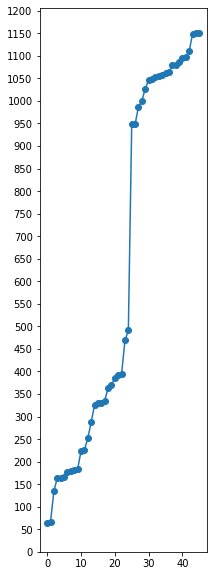

In [682]:
plt.figure(figsize=(3,10))
plt.plot(np.sort(upper_yfs),'o-')
plt.yticks(np.arange(0,1250,50));

In [668]:
np.mean(upper_yfs), np.mean(upper_yfs)/2 # average extent and mid-point

(629.2688891304348, 314.6344445652174)

In [669]:
np.mean(lower_yfs), np.mean(lower_yfs)/2 # average extent and mid-point

(-76.6223, -38.31115)

In [688]:
basal_term_metrics = get_stem_terminal_metrics(comp_domains,morpho,stems,which_stem_domain='basal',soma_center=0)

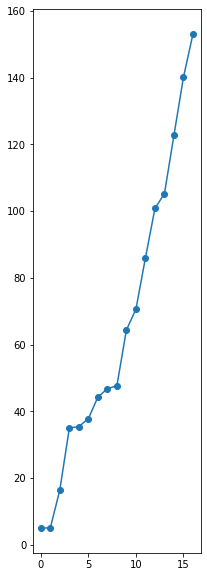

In [690]:
plt.figure(figsize=(3,10))
upper_yfs = basal_term_metrics[2]
plt.plot(np.sort(upper_yfs),'o-')
# plt.yticks(np.arange(0,1250,50));

## Stem root stuff

In [365]:
basal_init_groups = [group for group in basal_groups if group in stem_groups]

In [366]:
basal_init_groups, len(basal_init_groups)

(['dend_0',
  'dend_15',
  'dend_24',
  'dend_43',
  'dend_52',
  'dend_61',
  'dend_72',
  'dend_89'],
 8)

In [570]:
def get_stem_root_metrics(comp_domains,morpho,stems,which_stem_domain='basal',soma_center=0,divide_by='loc'):
    """
        Only meant for basal or non-basal/apical.
    """
    stem_domains = [s.split('_')[1]+'_'+s.split('_')[2] for s in stems.values()]
    
    stem_groups = get_domain_groups(which_stem_domain,comp_domains)
    stem_init_groups = [group for group in stem_groups if group in stem_domains] # does it belong to the stem root
    
    
    # to get average length, need to iterate through the initial segments
    root_lengths = []
    root_dists = []
    root_angles = []
    root_yis = []
    root_yfs = []
    root_xzis = []
    root_xzfs = []
    root_abs_ys = []

    for group in stem_init_groups:

        reduced_segments = get_domain_segments(morpho,[group],bounds=None) 
        proximal_list, distal_list = get_segment_coord_lists(reduced_segments,morpho,stems,verbose=False)

        if len(proximal_list):
            xi,yi,zi = np.float(proximal_list[0].attrib['x']),np.float(proximal_list[0].attrib['y']),np.float(proximal_list[0].attrib['z'])
            xf,yf,zf = np.float(distal_list[-1].attrib['x']),np.float(distal_list[-1].attrib['y']),np.float(distal_list[-1].attrib['z'])                                                          

            root_yis.append(yi) # root y pos
            root_yfs.append(yf)
            root_xzis.append(np.sqrt(xi**2+zi**2)) # root xz pos
            root_xzfs.append(np.sqrt(xf**2+zf**2)) # root xz pos
            root_abs_ys.append(yf-yi) # root y extent

            L = np.sqrt((xf-xi)**2 + (yf-yi)**2 + (zf-zi)**2) # root extent
            root_dists.append(L)

            root_lengths.append(compute_total_length(proximal_list,distal_list)) # root length
            root_angles.append(compute_average_orientation(proximal_list,distal_list)) # root angle
    
    
    # divide into upper and lower based on projection angle or location 
    if divide_by == 'angle':
        upper_angle =  circmean([radians(angle) for angle in root_angles if angle<180])
        lower_angle =  circmean([radians(angle) for angle in root_angles if angle>180])
    if divide_by == 'loc':
        upper_angle =  circmean([radians(angle) for angle,yi in zip(root_angles,root_yis) if yi>soma_center])
        lower_angle =  circmean([radians(angle) for angle,yi in zip(root_angles,root_yis) if yi<soma_center])
        
    if divide_by == 'angle':
        upper_length =  np.mean([length for length, angle in zip(root_lengths,root_angles) if angle<180])
        lower_length =  np.mean([length for length, angle in zip(root_lengths,root_angles) if angle>180])
    if divide_by == 'loc':
        upper_length = np.mean([length for length,yi in zip(root_lengths,root_yis) if yi>soma_center])
        lower_length = np.mean([length for length,yi in zip(root_lengths,root_yis) if yi<soma_center])
    
    if divide_by == 'angle':
        upper_dist = np.mean([dist for dist, angle in zip(root_dists,root_angles) if angle<180])
        lower_dist = np.mean([dist for dist, angle in zip(root_dists,root_angles) if angle>180])
    if divide_by == 'loc':
        upper_dist = np.mean([dist for dist,yi in zip(root_dists,root_yis) if yi>soma_center])
        lower_dist = np.mean([dist for dist,yi in zip(root_dists,root_yis) if yi<soma_center])
        
    if divide_by == 'angle':
        upper_y_dist = np.mean([dist for dist, angle in zip(root_abs_ys,root_angles) if angle<180])
        lower_y_dist = np.mean([dist for dist, angle in zip(root_abs_ys,root_angles) if angle>180])
    if divide_by == 'loc':
        upper_y_dist = np.mean([dist for dist,yi in zip(root_abs_ys,root_yis) if yi>soma_center])
        lower_y_dist = np.mean([dist for dist,yi in zip(root_abs_ys,root_yis) if yi<soma_center])
    
    
    return root_yis, root_yfs, root_xzis, root_xzfs, [upper_angle, lower_angle, upper_length, lower_length, upper_dist, lower_dist, upper_y_dist, lower_y_dist]

In [564]:
soma_center

-0.6433

In [571]:
basal_metrics = get_stem_root_metrics(comp_domains,morpho,stems,
                                      which_stem_domain='basal',
                                      soma_center=soma_center,
                                      divide_by='loc')

In [572]:
basal_metrics[0]

[-3.98997, -5.9817, -8.60565, -5.17952, 12.1241, -8.00069, -8.24584, -12.0876]

In [573]:
basal_metrics[4] # 0 and 1 are averaged and so they are lists of values

[0.24720245372993616,
 6.097273349055169,
 15.147227103270787,
 13.037311162664663,
 14.644792491998649,
 12.64891868817857,
 13.9582,
 -6.086572857142857]

In [579]:
apical_metrics = get_stem_root_metrics(comp_domains,morpho,stems,
                                       which_stem_domain='apical',
                                       soma_center=soma_center,
                                      divide_by='loc')

In [580]:
apical_metrics[4]

[0.8231824335408515,
 nan,
 47.98387933852478,
 nan,
 47.15245006246967,
 nan,
 44.6262,
 nan]

In [581]:
apical_metrics[0]

[13.5679]

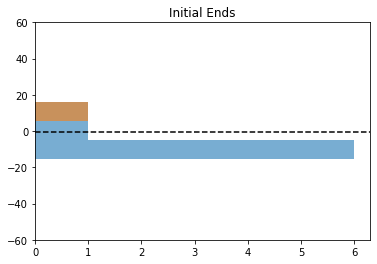

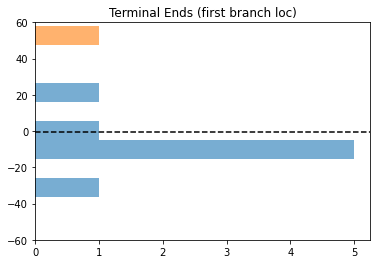

In [557]:
# every compartment acts as a dipole
apic_yis = apical_metrics[0]
basal_yis = basal_metrics[0]

apic_yfs = apical_metrics[1]
basal_yfs = basal_metrics[1]

bins = np.linspace(np.min(basal_yfs),np.max(apic_yfs),10)

plt.figure()
plt.axhline(soma_center,color='k',linestyle='--')

plt.hist(basal_yis,bins=bins,alpha=0.6,orientation='horizontal')
plt.hist(apic_yis,bins=bins,alpha=0.6,orientation='horizontal');

plt.title('Initial Ends')
plt.ylim([-60,60]);



plt.figure()
plt.axhline(soma_center,color='k',linestyle='--')

plt.hist(basal_yfs,bins=bins,alpha=0.6,orientation='horizontal')
plt.hist(apic_yfs,bins=bins,alpha=0.6,orientation='horizontal');

plt.title('Terminal Ends (first branch loc)')
plt.ylim([-60,60]);

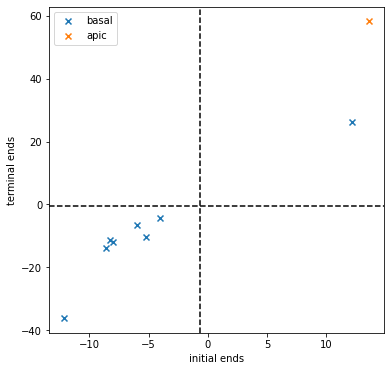

In [555]:
plt.figure(figsize=(6,6))
plt.scatter(basal_yis,basal_yfs,label='basal',marker='x')
plt.scatter(apic_yis,apic_yfs,label='apic',marker='x')

plt.axvline(soma_center,color='k',linestyle='--')
plt.axhline(soma_center,color='k',linestyle='--')

plt.xlabel('initial ends')
plt.ylabel('terminal ends')

plt.legend(loc='upper left');


In [521]:
# to get average length, need to iterate through the initial segments
basal_lengths = []
basal_dists = []
basal_angles = []
basal_yis = []
basal_xzis = []
basal_abs_ys = []

for group in basal_init_groups:

    reduced_segments = get_domain_segments(morpho,[group],bounds=None) 
    proximal_list, distal_list = get_segment_coord_lists(reduced_segments,morpho,stems,verbose=False)
        
    if len(proximal_list):
        xi,yi,zi = np.float(proximal_list[0].attrib['x']),np.float(proximal_list[0].attrib['y']),np.float(proximal_list[0].attrib['z'])
        xf,yf,zf = np.float(distal_list[-1].attrib['x']),np.float(distal_list[-1].attrib['y']),np.float(distal_list[-1].attrib['z'])                                                          
                                                                                                     
        basal_yis.append(yi)
        basal_xzis.append(np.sqrt(xi**2+zi**2))
        basal_abs_ys.append(yf-yi)
        
        L = np.sqrt((xf-xi)**2 + (yf-yi)**2 + (zf-zi)**2)
        basal_dists.append(L)
                                                                 
        basal_lengths.append(compute_total_length(proximal_list,distal_list))
        basal_angles.append(compute_average_orientation(proximal_list,distal_list))

In [332]:
np.array(basal_dists)-np.array(basal_lengths)

array([ 0.        , -1.1097135 , -0.64117843, -0.04117604, -0.50243461,
       -0.17294696, -0.32168814, -0.43204425])

In [333]:
import matplotlib.pyplot as plt

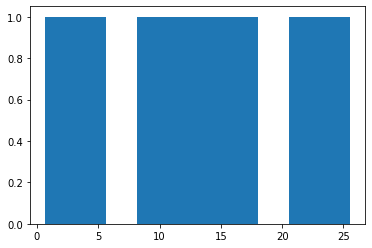

In [334]:
plt.hist(basal_dists,bins=10);

In [336]:
upper_angles =  [angle for angle in basal_angles if angle<180]
lower_angles =  [angle for angle in basal_angles if angle>180]

# not sure if these are useful values, for deep pyramids these don't extend out enough - it's likely more related to the terminal points, but that's too much work
upper_lengths =  [length for length, angle in zip(basal_lengths,basal_angles) if angle<180]
lower_lengths =  [length for length, angle in zip(basal_lengths,basal_angles) if angle>180]

upper_dists = [dist for dist, angle in zip(basal_dists,basal_angles) if angle<180]
lower_dists = [dist for dist, angle in zip(basal_dists,basal_angles) if angle>180]

upper_y_dists = [dist for dist, angle in zip(basal_abs_ys,basal_angles) if angle<180]
lower_y_dists = [dist for dist, angle in zip(basal_abs_ys,basal_angles) if angle>180]

# using upper and lower, so can use regular mean
print('upper:')
print(np.mean(upper_angles), np.mean(upper_lengths),np.mean(upper_dists),np.mean(upper_y_dists))

print('lower:')
print(np.mean(lower_angles), np.mean(lower_lengths),np.mean(lower_dists),np.mean(lower_y_dists))


upper:
14.163657284003357 15.147227103270787 14.644792491998649 13.9582
lower:
348.41054961722523 13.037311162664663 12.64891868817857 -6.086572857142857


In [223]:
compute_average_orientation(proximal_list,distal_list)

14.163657284003357

In [224]:
compute_CV_orientation(proximal_list,distal_list)

NameError: name 'compute_CV_orientation' is not defined

In [225]:
compute_total_length(proximal_list,distal_list)

15.147227103270787

In [226]:
compute_average_distance(distal_list)

472.07461538199874

In [98]:
# assymetric version
upper_basal_segments = get_domain_segments(morpho,basal_groups,bounds=[[0,y_ub],rad_ub])
lower_basal_segments = get_domain_segments(morpho,basal_groups,bounds=[[y_lb,0],rad_ub])

proximal_list_u, distal_list_u = get_segment_coord_lists(upper_basal_segments,morpho,stems)
proximal_list_l, distal_list_l = get_segment_coord_lists(lower_basal_segments,morpho,stems)


# angle stuff
mean_orient_u = compute_average_orientation(proximal_list_u,distal_list_u)
mean_orient_l = compute_average_orientation(proximal_list_l,distal_list_l)

orientation_asym = (180-(mean_orient_u+np.abs(mean_orient_l)))/180

cv_orient_u = compute_CV_orientation(proximal_list_u,distal_list_u)
cv_orient_l = compute_CV_orientation(proximal_list_l,distal_list_l)

cv_orientation_asym = (cv_orient_u-cv_orient_l)/(cv_orient_u+cv_orient_l)

# segment length stuff
upper_length = compute_total_length(proximal_list_u,distal_list_u)
lower_length = compute_total_length(proximal_list_l,distal_list_l)

length_asym = (upper_length-lower_length)/(upper_length+lower_length)

# position stuff
mean_dist_u = compute_average_distance(distal_list_u)
mean_dist_l = compute_average_distance(distal_list_l)

dist_asym = (mean_dist_u-mean_dist_l)/(mean_dist_u+mean_dist_l)



print('Mean upper angle:',mean_orient_u,', Mean lower angle:',mean_orient_l)
print('Upper angle dispersion:',cv_orient_u,', Lower angle dispersion:',cv_orient_l)
print('Orientation asymmetry | mean:',orientation_asym,', dispersion:',cv_orientation_asym)

print('\nTotal upper length:',upper_length,', Total lower length:',lower_length)
print('Length asymmetry:',length_asym)

print('\nMean upper distance:',mean_dist_u,', mean lower distance:',mean_dist_l)
print('Distance asymmetry | mean:',dist_asym)

Mean upper angle: 1.4327908497907937 , Mean lower angle: -11.525908021765105
Upper angle dispersion: 1.425127586050782 , Lower angle dispersion: 1.397131782620319
Orientation asymmetry | mean: 0.9280072284913561 , dispersion: 0.009919642305464379

Total upper length: 431.38176866417973 , Total lower length: 1616.0009455271058
Length asymmetry: -0.5786017282708423

Mean upper distance: 1866.07459189607 , mean lower distance: 5534.695839913235
Distance asymmetry | mean: -0.495708018755593
